In [1]:
import matplotlib
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [14]:
housing = pd.read_csv('data\housing_rates_over_time.csv')
population = pd.read_csv('data\ohio_counties_population_2010-18.csv')
population = population.rename(columns={'Geographic Area Name':'county','Year':'year'})
population

,id,county,year,Population
0,0500000US39001,"Adams County, Ohio",2018,27878
1,0500000US39003,"Allen County, Ohio",2018,103642
2,0500000US39005,"Ashland County, Ohio",2018,53477
3,0500000US39007,"Ashtabula County, Ohio",2018,98136
4,0500000US39009,"Athens County, Ohio",2018,65936
...,...,...,...,...
171,0500000US39167,"Washington County, Ohio",2010,62066
172,0500000US39169,"Wayne County, Ohio",2010,114438
173,0500000US39171,"Williams County, Ohio",2010,38172
174,0500000US39173,"Wood County, Ohio",2010,125295


In [116]:
housing_3c = housing[housing.county.isin(['Cuyahoga County, Ohio',
                                         'Franklin County, Ohio',
                                         'Hamilton County, Ohio',
                                         ])]

population_3c = population[population.county.isin(['Cuyahoga County, Ohio',
                                         'Franklin County, Ohio',
                                         'Hamilton County, Ohio',
                                         ])]

pop_housing_3c = housing_3c.merge(population_3c,how='left', on=['county','year'])
pop_housing_3c = pop_housing_3c.rename(columns={'total_units':'# Housing Units (Solid)','Population':'Population (Dashed)'})

Text(0, 0.5, 'Number of Housing Units')

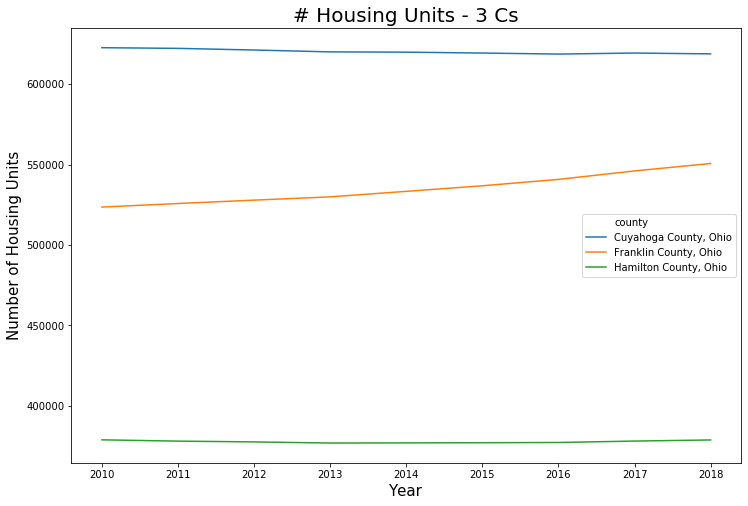

In [117]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)


sns.lineplot(x='year',
             y='total_units',
             data=housing_3c,
             hue='county'
            )

plt.title('# Housing Units - 3 Cs',size=20)
plt.xlabel('Year',size=15)
plt.ylabel('Number of Housing Units',size=15)


#plt.xlim(1000, 82000)
#plt.legend(loc='upper right')
#plt.ylim(0, None)
#plt.text(1.59, 625, "Correlation = 0.44", horizontalalignment='right', size='medium', color='black', weight='semibold')
#plt.text(80000, 7500, "Non-Charter Correlation = .18", horizontalalignment='right', size='large', color='black', weight='semibold')



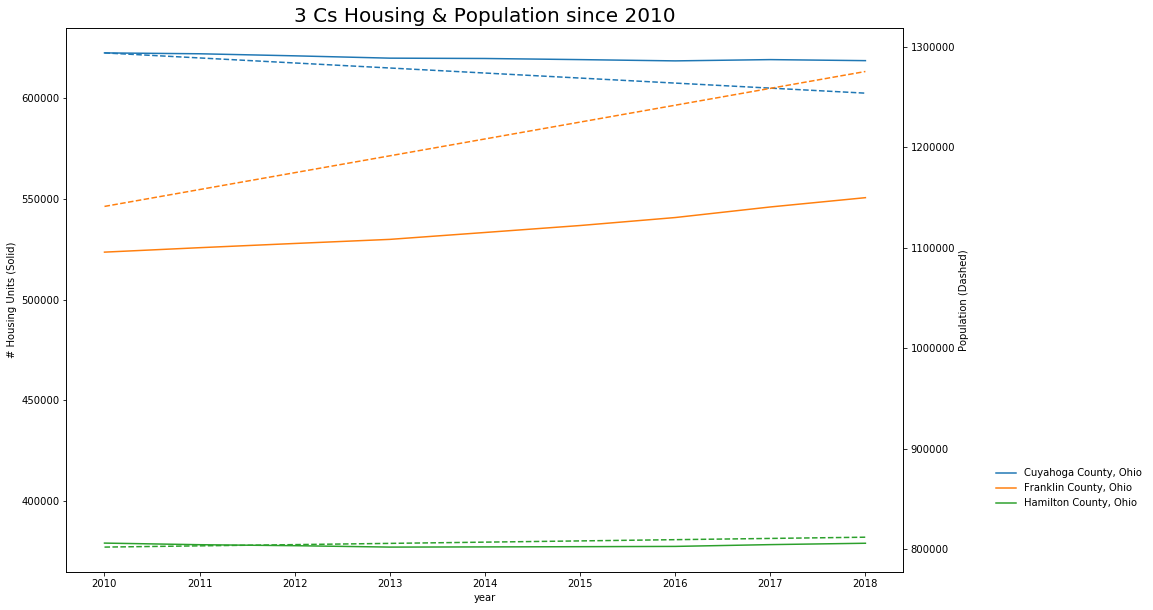

In [120]:
#dual axis

fig, ax = plt.subplots()
fig.set_size_inches(15,10)


ax = sns.lineplot(x="year", y="# Housing Units (Solid)", data=pop_housing_3c, hue='county', legend=False)
ax2 = ax.twinx()
sns.lineplot(x="year", y="Population (Dashed)", hue='county', data=pop_housing_3c, ax=ax2, style=True, legend=False)
ax.legend(pop_housing_3c['county'], title='', bbox_to_anchor=(1.1, .1), loc='lower left',frameon=False)

for line in ax2.lines:
    line.set_linestyle("--")
    
plt.title('3 Cs Housing & Population since 2010',size=20)
    
plt.show()